['Win']
['Fail' nan]
0은 오브젝트를 못먹은 경우, 1은 오브젝트를 먹은 경우
   WinGame_Firstkill  LoseGame_Firstkill  WinGame_firsttower   
0           0.603101            0.601059            0.739626  \
1           0.396899            0.398941            0.260374   

   LoseGame_firsttower  WinGame_firstInhibit  LoseGame_firstInhibit   
0             0.732654               0.68474               0.940678  \
1             0.267346               0.31526               0.059322   

   WinGame_firstbaron  LoseGame_firstbaron  WinGame_firstdragon   
0            0.579118             0.914322             0.551069  \
1            0.420882             0.085678             0.448931   

   LoseGame_firstdragon  WinGame_firstriftherald  LoseGame_firstriftherald  
0              0.712084                 0.595539                  0.679182  
1              0.287916                 0.404461                  0.320818  
[0.603101   0.60105944 0.73962569 0.73265381 0.68473996 0.94067778
 0.57911821 0.914322   0.55106894 0.7120

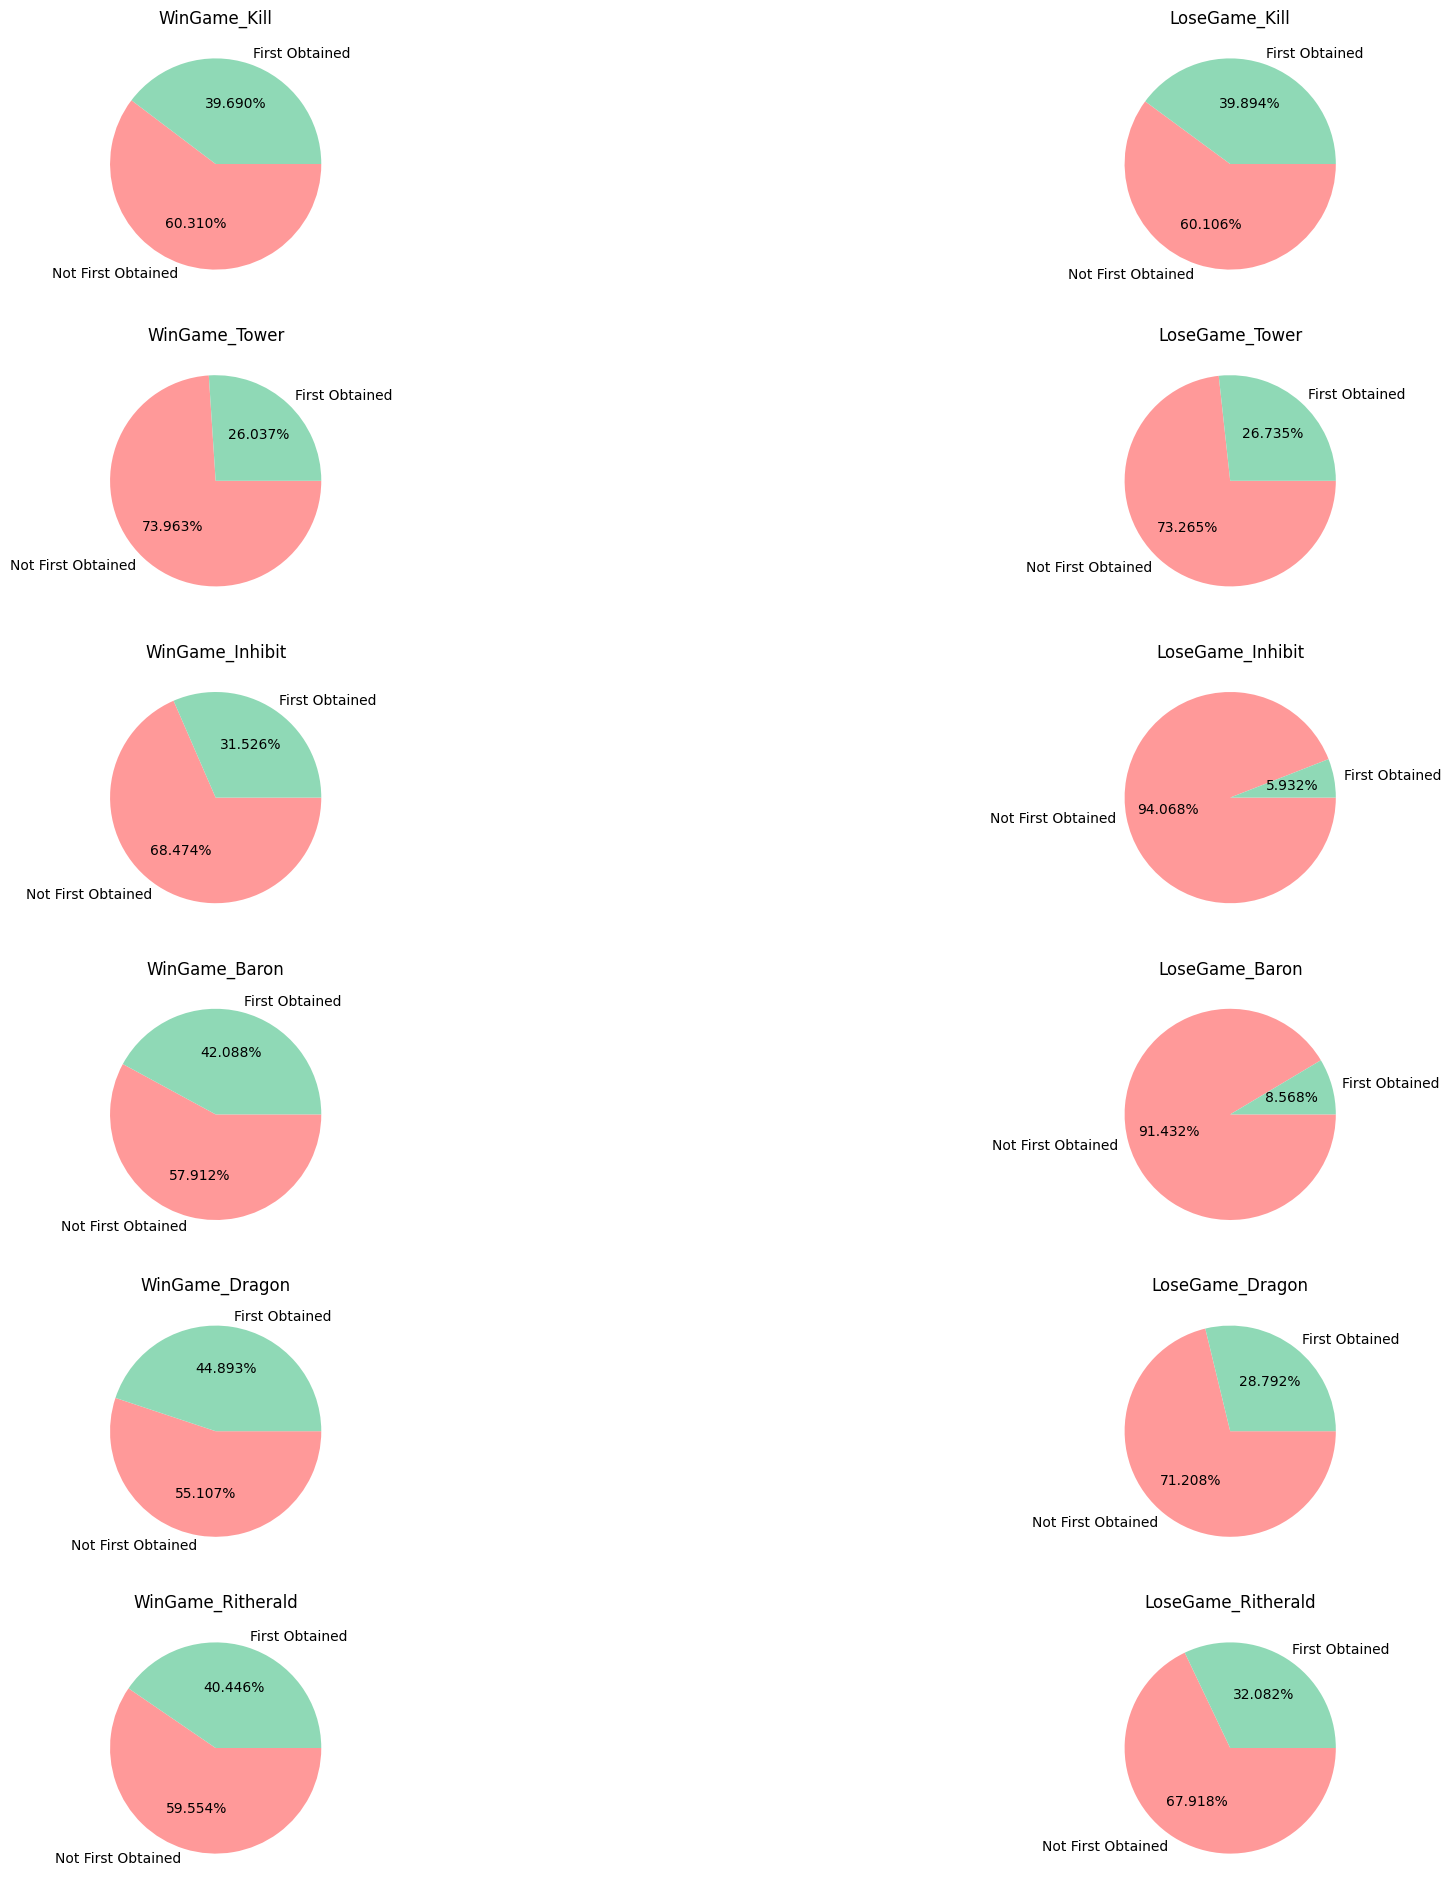

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns # heatmap
import pydotplus
import os
import pandas as pd
import numpy as np
import pickle
import numpy as np
import json
import re 
import time
import ast
from pandas.io.json import _normalize
import json
import pprint
# API 호출을 위해 requests 모듈을 사용
import requests
api_key = 'RGAPI-3576e661-885e-49d1-9fcc-59a8b7db1a5d'



pp = pprint.PrettyPrinter(indent=4)
request_header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": "RGAPI-3576e661-885e-49d1-9fcc-59a8b7db1a5d"
}


# API 에서 공통적으로 사용하는 텍스트를 선언
apiDefault = {
    'region': 'https://kr.api.riotgames.com',  # 한국서버를 대상으로 호출
    'key': 'RGAPI-3576e661-885e-49d1-9fcc-59a8b7db1a5d',  # API KEY 
    'summonerName': 'ecrrd',  # 닉네임
}

# api 호출시 사용되는 url
url = F"{apiDefault['region']}/lol/summoner/v4/summoners/by-name/{apiDefault['summonerName']}?api_key={apiDefault['key']}" #  f-string 이라는 파이썬의 문자열을 연결해 주는 기능입니다

# get method 를 통해 api 호출
req = requests.get(url)

win_data = pd.read_csv('./match_winner_data_version1.csv') # 이긴 데이터
lose_data = pd.read_csv('./match_loser_data_version1.csv') # 패배 데이터
plue_data = pd.read_csv('./new_match_chall+grand.csv') # 


print(win_data['win'].unique())
print(lose_data['win'].unique())

# Nan값 제거
lose_data = lose_data.dropna(axis=0)


win_data.sample(5)
lose_data.sample(5)

# 10만 게임중 서로다른 게임끼리 학습을 위해 분리
win_data = win_data[:50415]
lose_data = lose_data[50414:]

# 데이터 결합
win_data.sample(5)
lose_data.sample(5)

lol_data = pd.merge(win_data,lose_data, how="outer")
lol_data.drop(['Unnamed: 0'], axis = 1, inplace = True)


# 데이터 셔플
lol_data_shuffle = lol_data.sample(frac=1).reset_index(drop=True)

# 데이터 전처리 불필요한 열 제거
lol_data_shuffle = lol_data_shuffle.drop(['bans','gameId'], axis = 1)

# 추가 데이터 전처리 불필요한 열 제거
plus_data = plue_data.drop(['gameId'],axis = 1)

# 데이터 전처리과정
lol_data_shuffle = lol_data_shuffle.drop(['teamId','dominionVictoryScore','vilemawKills'],axis = 1)
plus_data = plus_data.drop(['teamId'],axis = 1)

lol_data_shuffle = lol_data_shuffle.replace('Win',1)
lol_data_shuffle = lol_data_shuffle.replace('Fail',0)
plus_data = plus_data.replace('Win',1)
plus_data = plus_data.replace('Fail',0)


# 추가 데이터(약 7만개) + 기존 데이터(약 11만개)
add_data = pd.concat([lol_data_shuffle,plus_data], ignore_index = True)


## 데이터 통계

# 첫번째 킬한 상황
win_kill_data = add_data[add_data['win']==1.0]['firstBlood']
win_firstblood = win_kill_data.value_counts(normalize=True)

lose_kill_data = add_data[add_data['win']==0.0]['firstBlood']
# print(data2.value_counts(normalize=True))
lose_firstblood = lose_kill_data.value_counts(normalize=True)

# print('Game win : \n',win_firstblood)
# print('Game lose : \n',lose_firstblood)


# 첫번째 타워 먹은 상황
win_tower_data = add_data[add_data['win']==1.0]['firstTower']
win_firsttower = win_tower_data.value_counts(normalize=True)

lose_tower_data = add_data[add_data['win']==0.0]['firstTower']
lose_firsttower = lose_tower_data.value_counts(normalize=True)


# 첫번째 억제기 먹은 상황
win_inhib_data = add_data[add_data['win']==1.0]['firstInhibitor']
win_Inhibit = win_inhib_data.value_counts(normalize=True)

lose_inhib_data = add_data[add_data['win']==0.0]['firstInhibitor']
lose_Inhibit = lose_inhib_data.value_counts(normalize=True)
# print(win_Inhibit)
# print(lose_Inhibit)
# 첫번째 바론 먹은 상황
win_baron_data = add_data[add_data['win']==1.0]['firstBaron']
win_firstbaron = win_baron_data.value_counts(normalize=True)

lose_baron_data = add_data[add_data['win']==0.0]['firstBaron']
lose_firstbaron = lose_baron_data.value_counts(normalize=True)


# 첫번째 용 먹은 상황
win_dragon_data = add_data[add_data['win']==1.0]['firstDragon']
win_firstdragon = win_dragon_data.value_counts(normalize=True)

lose_dragon_data = add_data[add_data['win']==0.0]['firstDragon']
lose_firstdragon = lose_dragon_data.value_counts(normalize=True)


# 첫번째 전령 먹은 상황
win_riftherald_data = add_data[add_data['win']==1.0]['firstRiftHerald']
win_firstriftherald = win_riftherald_data.value_counts(normalize=True)

lose_riftherald_data = add_data[add_data['win']==0.0]['firstRiftHerald']
lose_firstriftherald = lose_riftherald_data.value_counts(normalize=True)


print("0은 오브젝트를 못먹은 경우, 1은 오브젝트를 먹은 경우")
data_weight = pd.DataFrame({'WinGame_Firstkill':[win_firstblood[0],win_firstblood[1]],
                           'LoseGame_Firstkill':[lose_firstblood[0],lose_firstblood[1]],
                           
                            'WinGame_firsttower':[win_firsttower[0],win_firsttower[1]],
                           'LoseGame_firsttower':[lose_firsttower[0],lose_firsttower[1]],
                         
                            'WinGame_firstInhibit':[win_Inhibit[0],win_Inhibit[1]],
                           'LoseGame_firstInhibit':[lose_Inhibit[0],lose_Inhibit[1]],
                          
                            'WinGame_firstbaron':[win_firstbaron[0],win_firstbaron[1]],
                           'LoseGame_firstbaron':[lose_firstbaron[0],lose_firstbaron[1]],
                            
                           'WinGame_firstdragon':[win_firstdragon[0],win_firstdragon[1]],
                           'LoseGame_firstdragon':[lose_firstdragon[0],lose_firstdragon[1]],
                         
                            'WinGame_firstriftherald':[win_firstriftherald[0],win_firstriftherald[1]],
                           'LoseGame_firstriftherald':[lose_firstriftherald[0],lose_firstriftherald[1]],
                           })

print(data_weight)
a = np.array(data_weight)
print(a[0])
print(a[1])


# 데이터 시각화

# 총 17만개의 게임경기 데이터
colors = ['#FF9999', '#8fd9b6']
fig, axes = plt.subplots(6,2,figsize=(24,24))

num = 0
for i in range(6):
    for j in range(2):
        axes[i][j].pie((a[0][num],a[1][num]),labels=['Not First Obtained','First Obtained'],autopct='%.3f%%', startangle=360, counterclock=False, colors = colors)
        num += 1

axes[0][0].set_title("WinGame_Kill") #첫킬
axes[0][1].set_title("LoseGame_Kill")        
axes[1][0].set_title("WinGame_Tower") # 타워
axes[1][1].set_title("LoseGame_Tower")    
axes[2][0].set_title("WinGame_Inhibit") #억제기
axes[2][1].set_title("LoseGame_Inhibit")    
axes[3][0].set_title("WinGame_Baron") #바론
axes[3][1].set_title("LoseGame_Baron")  
axes[4][0].set_title("WinGame_Dragon") #드래곤
axes[4][1].set_title("LoseGame_Dragon")    
axes[5][0].set_title("WinGame_Ritherald") #정령
axes[5][1].set_title("LoseGame_Ritherald")    

plt.show()

In [10]:

#챌린저 그랜드마스터 마스터 데이터 불러오기
grandmaster = F"{apiDefault['region']}/lol/league/v4/grandmasterleagues/by-queue/RANKED_SOLO_5x5?api_key={apiDefault['key']}"
r = requests.get(grandmaster)#그마데이터 호출
league_df = pd.DataFrame(r.json())

league_df.reset_index(inplace=True)#수집한 그마데이터 index정리
league_entries_df = pd.DataFrame(dict(league_df['entries'])).T #dict구조로 되어 있는 entries컬럼 풀어주기
league_df = pd.concat([league_df, league_entries_df], axis=1) #열끼리 결합

league_df = league_df.drop(['index', 'queue', 'name', 'leagueId', 'entries', 'rank'], axis=1)
league_df.info()
league_df.to_csv('그마데이터.csv',index=False,encoding = 'cp949')#중간저장

# 마스터 데이터
master = F"{apiDefault['region']}/lol/league/v4/masterleagues/by-queue/RANKED_SOLO_5x5?api_key={apiDefault['key']}"
r = requests.get(master)#마스터데이터 호출
league_df_master = pd.DataFrame(r.json())

league_df_master.reset_index(inplace=True)#수집한 그마데이터 index정리
league_entries_df = pd.DataFrame(dict(league_df_master['entries'])).T #dict구조로 되어 있는 entries컬럼 풀어주기
league_df_master = pd.concat([league_df_master, league_entries_df], axis=1) #열끼리 결합


league_df_master = league_df_master.drop(['index', 'queue', 'name', 'leagueId', 'entries', 'rank'], axis=1)
league_df_master.info()
league_df_master.to_csv('마스터데이터.csv',index=False,encoding = 'cp949')#중간저장

# 챌린저 데이터
challenger = F"{apiDefault['region']}/lol/league/v4/challengerleagues/by-queue/RANKED_SOLO_5x5?api_key={apiDefault['key']}"
r = requests.get(challenger)#챌린저데이터 호출
league_df_challenger = pd.DataFrame(r.json())

league_df_challenger.reset_index(inplace=True)#수집한 그마데이터 index정리
league_entries_df = pd.DataFrame(dict(league_df_challenger['entries'])).T #dict구조로 되어 있는 entries컬럼 풀어주기
league_df_challenger = pd.concat([league_df_challenger, league_entries_df], axis=1) #열끼리 결합

league_df_challenger = league_df_challenger.drop(['index', 'queue', 'name', 'leagueId', 'entries', 'rank'], axis=1)
league_df_challenger.info()
league_df_challenger.to_csv('챌린저데이터.csv',index=False,encoding = 'cp949')#중간저장




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tier          700 non-null    object
 1   summonerId    700 non-null    object
 2   summonerName  700 non-null    object
 3   leaguePoints  700 non-null    object
 4   wins          700 non-null    object
 5   losses        700 non-null    object
 6   veteran       700 non-null    object
 7   inactive      700 non-null    object
 8   freshBlood    700 non-null    object
 9   hotStreak     700 non-null    object
dtypes: object(10)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10881 entries, 0 to 10880
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tier          10881 non-null  object
 1   summonerId    10881 non-null  object
 2   summonerName  10881 non-null  object
 3   leaguePoints  10881 non-n

In [11]:
puuid = {}
for i in range(len(league_df_challenger)):
    try:
        sohwan = 'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/' + league_df_challenger['summonerName'].iloc[i] + '?api_key=' + api_key 
        r = requests.get(sohwan)
        
        while r.status_code == 429:
            time.sleep(5)
            sohwan = 'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/' + league_df_challenger['summonerName'].iloc[i] + '?api_key=' + api_key 
            r = requests.get(sohwan)
            
        puuid[i] = r.json()['puuid']
        league_df_challenger.iloc[i, -1] = puuid[i]
    
    except:
        pass

In [13]:
league_df_challenger.head()
print(puuid)

F2IsrZaMTyn5Lys3679W0vfliunt5BGFeMRc915PevMPiV5tZjkkD0ePSNAa6E4cAyDemrXBm9IXuw


In [4]:
def match_v5_get_list_match_id(puuid, start, count):
    url = f"https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start={start}&count={count}"
    return requests.get(url, headers=request_header).json()

In [17]:
#13시즌의 데이터만을 이용할 것이며 league_df3 => 기존에 수집한 account_id가 있는 league_df
match_info_df = pd.DataFrame()
season = str(13)
for i in range(len(league_df)):
    try:
        match0 = 'https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/' + league_df['account_id'].iloc[i]  +'?season=' + season + '&api_key=' + api_key
        r = requests.get(match0)
        
        while r.status_code == 429:
            time.sleep(5)
            match0 = 'https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/' + league_df['account_id'].iloc[i]  +'?season=' + season + '&api_key=' + api_key
            r = requests.get(match0)
            
        match_info_df = pd.concat([match_info_df, pd.DataFrame(r.json()['matches'])])
    
    except:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146


In [16]:
print(league_df.shape)
print(league_df.head)

league_df.to_csv('챌린저')

(300, 10)
<bound method NDFrame.head of            tier                                         summonerId   
0    CHALLENGER  7lF5f5eJhy6YGLlSp3kFE1W53BFREl1FPkxA1P-w-cWxd3...  \
1    CHALLENGER  _v5B_JJSkvJ8HBw7sHsM6aRvmD3ErfgjubnBaBFvVVnYIa...   
2    CHALLENGER    bKxiy5ebHcGHublwmL1qHCCYpkRgVxthhunO9gQu5ScZVX8   
3    CHALLENGER  EEZyEUGmm6oqXUcXocd5vwEo8HnVeUnlAf-nhx_jzZnt5a...   
4    CHALLENGER    -2D07wl8o_Zqte1Ev6j7TMki98mcaVaKOvP6Ao08R3oeRbY   
..          ...                                                ...   
295  CHALLENGER    iURBjAaq-mZLdK50bXp9NuDeitz1ukg0IcAUU1uBFLXvmFo   
296  CHALLENGER  98k87KEulo2Ua1JZOzbacJa26Zo9dr2ocxzGJXB0AAgOAi...   
297  CHALLENGER    bx0axXd6B0uqVIznAcB-aq6rYAFIhfYJVtY4AC26NdalMhA   
298  CHALLENGER  e9yC4BeTZTZKECCaCSshjDD3mJwkKugOS8ljCFCJez7Qx3...   
299  CHALLENGER  0vMw5g8ZBTgLemTPsj9JsIEQWfPP_-VkMdgu_IjWs2rYNc...   

         summonerName leaguePoints wins losses veteran inactive freshBlood   
0          baozaopiqi         1010  385  